In [1]:
import json
import os
import copy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import re
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
# from statannotations.Annotator import Annotator
from constants import *
from funcs import *

Condition 1: [15, 15, 12, 13, 14, 12, 12, 14, 14, 10, 19, 12, 13, 11, 13, 14, 10, 13]
Condition 2: [13, 15, 13, 10, 14, 16, 15, 16, 15, 11, 14, 14, 15, 13, 13, 17, 15, 15]
Condition 3: [14, 13, 16, 14, 14, 13, 14, 12, 14, 17, 16, 16, 12, 14, 15, 14, 14, 13]
Condition 4: [13, 15, 8, 14, 14, 14, 10, 13, 14, 13, 14, 13, 16, 14, 12, 10, 14, 14]
Condition 5: [13, 14, 10, 14, 9, 12, 15, 15, 14, 10, 11, 11, 13, 13, 12, 13, 12, 15]
Condition 6: [15, 14, 14, 15, 16, 17, 15, 11, 14, 13, 15, 13, 14, 12, 13, 12, 16, 14]
F-statistic: 2.7125715277
p-value: 0.0241582537
✅✅✅✅✅


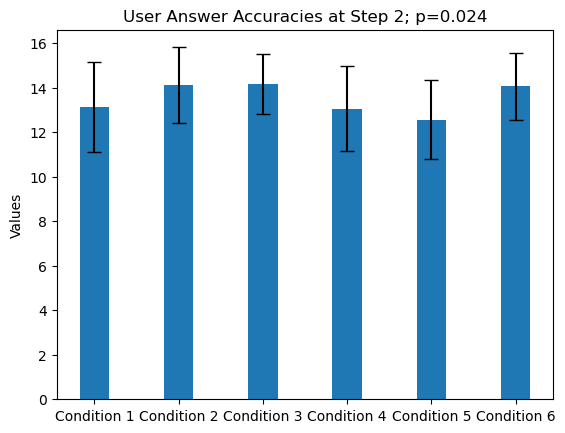

In [2]:
step = 1
compare = 'user_gt'
all_conditions = []
for condition in range(1, 7):
    data = load_conditions(compare, conditions=condition)
    data = prepare_stats(data, data_len=3)
    print(f"Condition {condition}: {data[step]}")
    all_conditions.append(data[step])

# print("Accuracy:")
# for i, d in enumerate(data):
#     print(f"Step {i+1}: {d}")
f, p = anova(all_conditions)
x_labels = [f"Condition {i}" for i in range(1, 7)]
plot_bar_chart(all_conditions, x_lables=x_labels, title=f"User Answer Accuracies at Step {step+1}; p={p:.3f}")

[[2, 1, 1, 0, 4, 3, 1, 3, 7, 0, 0, 4, 4, 4, 1, 0, 1, 0]]
[[2, 7, 1, 1, 7, 1, 6, 3, 2, 2, 2, 2, 0, 3, 2, 2, 5, 2]]
[[7, 2, 4, 2, 4, 11, 3, 2, 5, 6, 3, 5, 0, 5, 1, 3, 3]]
[[2, 4, 0, 0, 0, 3, 1, 1, 0, 0, 4, 4, 3, 1, 0, 0, 0, 3]]
[[10, 8, 13, 9, 11, 4, 10, 6, 8, 11, 11, 6, 8, 8, 10, 10, 10, 11]]
[[4, 2, 2, 4, 3, 3, 0, 1, 1, 1, 0, 0, 3, 2, 1, 0, 4, 2]]
F-statistic: 36.7482775074
p-value: 0.0000000000
✅✅✅✅✅


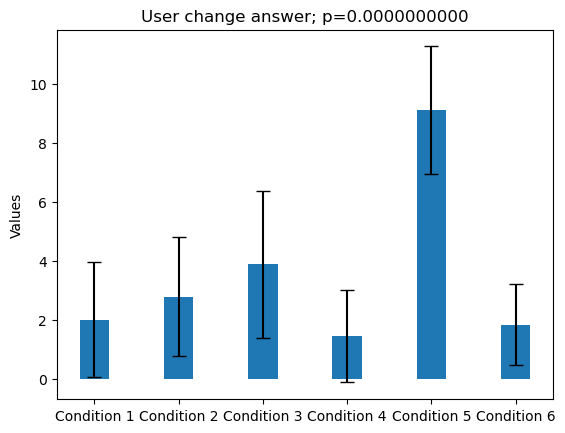

In [3]:
compare = 'user_gt'
all_conditions = []
for condition in range(1, 7):
    data = load_user_change_ans(condition=condition)
    data = prepare_stats(data, data_len=1)
    print(data)
    all_conditions += data

f, p = anova(all_conditions)
x_labels = [f"Condition {i}" for i in range(1, 7)]
plot_bar_chart(all_conditions, x_lables=x_labels, title=f"User change answer; p={p:.10f}")

Condition 1: 
[15, 14, 13, 13, 14, 15, 13, 15, 15, 10, 19, 12, 11, 13, 14, 14, 11, 13]
[15, 15, 15, 13, 13, 14, 13, 13, 14, 12, 16, 14, 14, 13, 14, 13, 10, 14]
F-statistic: 0.0095666854
p-value: 0.9226579591


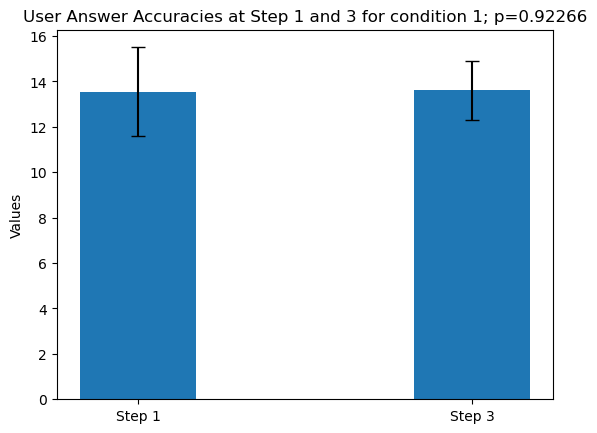

Condition 2: 
[13, 12, 12, 9, 11, 15, 11, 13, 17, 11, 12, 14, 15, 12, 11, 15, 12, 13]
[15, 14, 13, 11, 15, 16, 15, 16, 16, 11, 13, 16, 14, 13, 13, 15, 15, 15]
F-statistic: 6.9128630705
p-value: 0.0127575058
✅✅✅✅✅


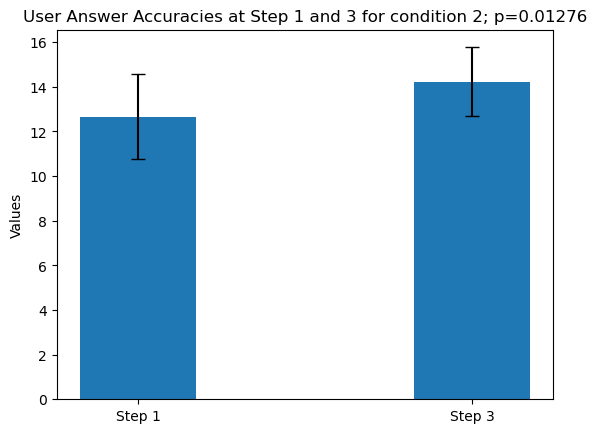

Condition 3: 
[13, 13, 14, 14, 16, 13, 11, 11, 12, 14, 14, 13, 11, 14, 14, 13, 15, 12]
[16, 13, 16, 14, 14, 13, 15, 12, 16, 17, 16, 16, 12, 15, 16, 15, 15, 16]
F-statistic: 11.9718309859
p-value: 0.0014740304
✅✅✅✅✅


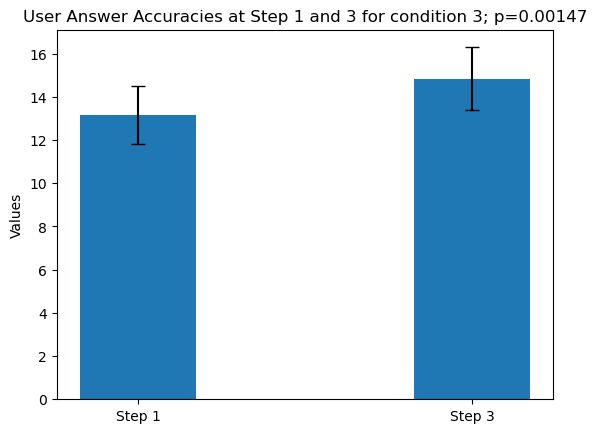

Condition 4: 
[13, 15, 8, 14, 14, 15, 11, 12, 14, 13, 14, 9, 13, 13, 12, 10, 14, 13]
[13, 15, 8, 14, 14, 14, 10, 13, 14, 13, 14, 14, 16, 14, 12, 10, 15, 14]
F-statistic: 0.7007419621
p-value: 0.4083801162


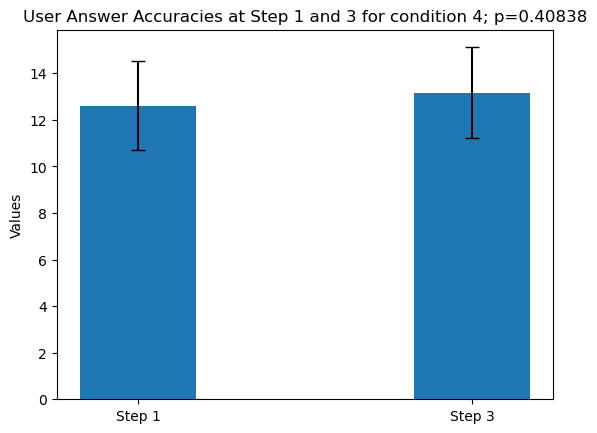

Condition 5: 
[13, 10, 15, 13, 12, 12, 11, 11, 14, 13, 12, 15, 11, 15, 14, 13, 8, 10]
[13, 9, 15, 16, 13, 10, 15, 16, 16, 13, 15, 15, 14, 15, 16, 14, 8, 15]
F-statistic: 3.8667563930
p-value: 0.0574582527


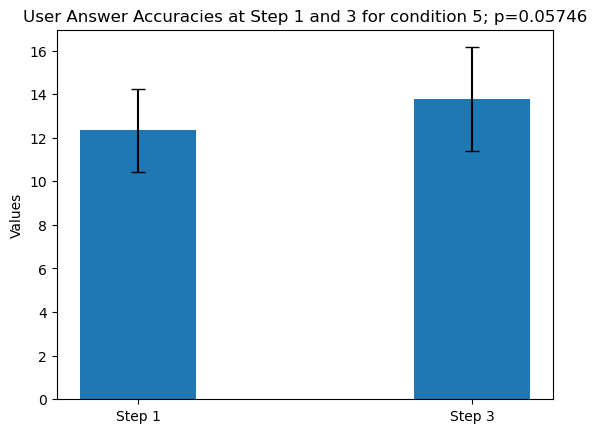

Condition 6: 
[13, 14, 14, 13, 15, 16, 15, 10, 13, 14, 15, 13, 13, 10, 14, 12, 12, 12]
[13, 14, 14, 15, 16, 17, 15, 11, 13, 14, 13, 12, 15, 11, 13, 12, 15, 14]
F-statistic: 0.8432333129
p-value: 0.3649423694


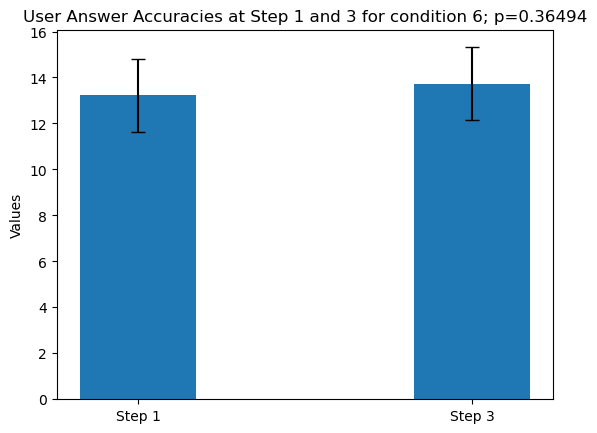

In [4]:
# Compare between STEPS

compare = 'user_gt'
all_conditions = []
t1=0
t2=2
for condition in range(1, 7):
    data = load_conditions(compare, conditions=condition)
    data = prepare_stats(data, data_len=3)
    current = [data[t1], data[t2]]
    print(f"Condition {condition}: ")
    print(current[0])
    print(current[1])
    f, p = anova(current)
    x_labels = [f"Step {t1+1}", f"Step {t2+1}"]
    plot_bar_chart(current, x_lables=x_labels, title=f"User Answer Accuracies at Step 1 and 3 for condition {condition}; p={p:.5f}")

# print("Accuracy:")
# for i, d in enumerate(data):
#     print(f"Step {i+1}: {d}")


F-statistic: 2.4787219199
p-value: 0.0366710197
✅✅✅✅✅


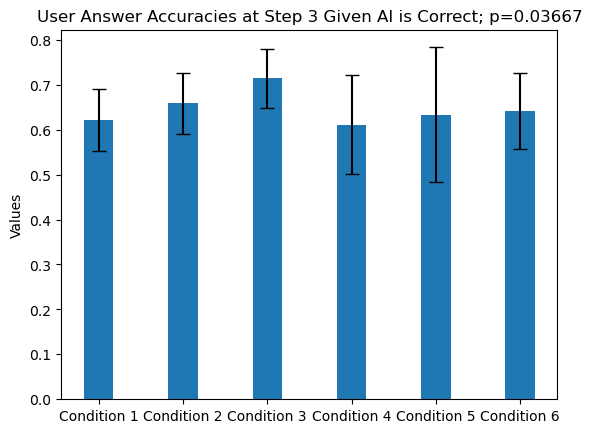

In [5]:
# Given AI is correct
acc_data = []
step = 2
for condition in range(1, 7):
    data = load_conditions(compare, conditions=condition)
    acc_ai_correct = get_acc(data, condition=condition, step=step)
    acc_data.append(acc_ai_correct)
    
f,p = anova(acc_data)
x_labels = [f"Condition {i}" for i in range(1, 7)]
plot_bar_chart(acc_data, x_lables=x_labels, title=f"User Answer Accuracies at Step {step + 1} Given AI is Correct; p={p:.5f}")

F-statistic: 6.5739308153
p-value: 0.0000242679
✅✅✅✅✅


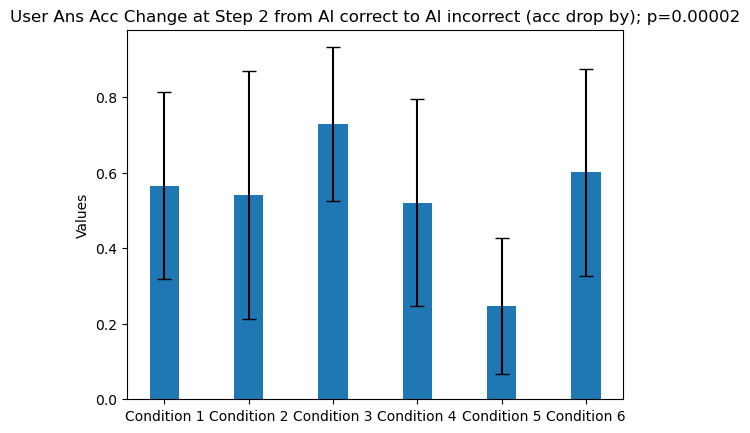

In [10]:
# User accuracies changes in percentage from AI correct ---> AI incorrect

def get_change(data, condition, step):
    res = []
    for user in data.keys():
        correct_ai_correct = 0
        correct_ai_incorrect = 0
        ai_correct = 0
        ai_incorrect = 0
        total = 0
        for i,q in enumerate(data[user][step]):
            total += 1
            gt = "Meal " + get_ground_truth(question=i+1)
            ai_ans = get_ai_ans_only(question=i+1, condition=condition)
            if ai_ans == gt:
                ai_correct += 1
                if q:
                    correct_ai_correct += 1
            if ai_ans != gt:
                ai_incorrect += 1
                if q:
                    correct_ai_incorrect += 1

        change = (correct_ai_correct / ai_correct) - (correct_ai_incorrect / ai_incorrect)
        res.append(change)
    return res

acc_data = []
step = 1
for condition in range(1, 7):
    data = load_conditions(compare, conditions=condition)
    acc_ai_correct = get_change(data, condition=condition, step=step)
    acc_data.append(acc_ai_correct)
    
f,p = anova(acc_data)
x_labels = [f"Condition {i}" for i in range(1, 7)]
plot_bar_chart(acc_data, x_lables=x_labels, title=f"User Ans Acc Change at Step {step + 1} from AI correct to AI incorrect (acc drop by); p={p:.5f}")

[[6, 5, 6, 6, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 5, 7], [5, 4, 7, 6, 7, 5, 7, 4, 3, 5, 5, 5, 4, 7, 6, 6, 7, 5], [6, 5, 4, 5, 6, 5, 2, 4, 4, 6, 1, 6, 3, 5, 5, 5, 7], [5, 3, 3, 1, 1, 5, 3, 6, 5, 4, 3, 5, 6, 2, 1, 5, 1, 5], [6, 5, 5, 6, 5, 6, 2, 6, 7, 4, 6, 4, 7, 4, 6, 3, 7, 5], [5, 2, 2, 6, 3, 2, 1, 5, 2, 4, 4, 7, 1, 2, 4, 3, 5, 6]]
F-statistic: 10.7620682368
p-value: 0.0000000260
✅✅✅✅✅


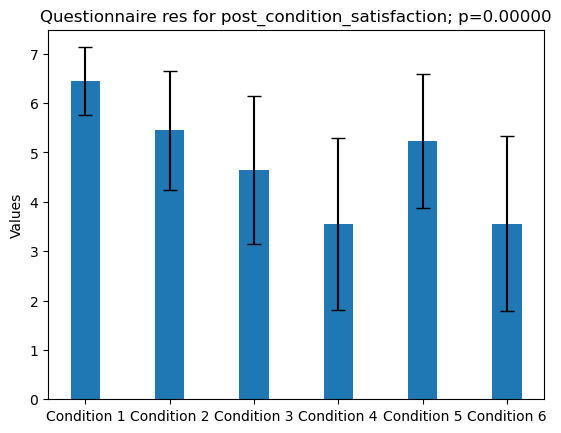

[[6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 7, 6, 5, 5, 5, 5, 6], [6, 5, 7, 5, 6, 4, 7, 6, 2, 6, 6, 5, 5, 7, 6, 6, 6, 5], [6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 4, 4, 7], [4, 7, 2, 6, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 4, 4], [7, 5, 6, 6, 4, 4, 7, 5, 7, 3, 6, 6, 6, 6, 6, 5, 5, 7], [6, 5, 6, 6, 4, 3, 3, 6, 1, 5, 5, 6, 7, 5, 5, 5, 4, 7]]
F-statistic: 1.5504517479
p-value: 0.1810302419


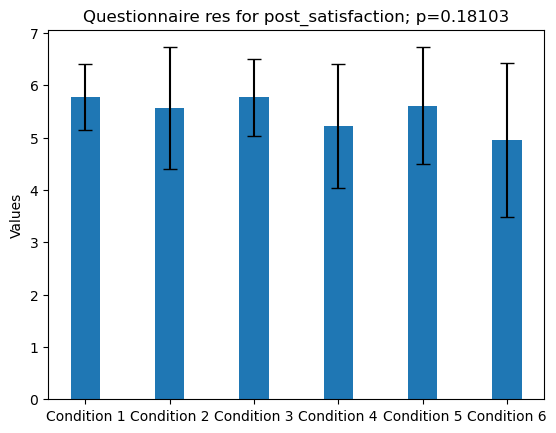

[[6, 6, 7, 5, 7, 6, 7, 5, 6, 6, 7, 7, 7, 7, 6, 5, 5, 7], [6, 5, 7, 5, 7, 5, 7, 6, 4, 6, 5, 5, 5, 7, 5, 7, 6, 6], [6, 7, 7, 6, 6, 7, 5, 6, 5, 7, 7, 6, 6, 7, 6, 2, 7], [6, 7, 5, 7, 5, 7, 2, 6, 6, 5, 7, 5, 6, 6, 7, 6, 4, 5], [7, 5, 7, 6, 5, 5, 7, 4, 6, 5, 6, 2, 6, 7, 6, 3, 6, 6], [4, 5, 5, 6, 3, 3, 4, 5, 2, 2, 3, 7, 3, 2, 5, 4, 3, 7]]
F-statistic: 7.0491163276
p-value: 0.0000108903
✅✅✅✅✅


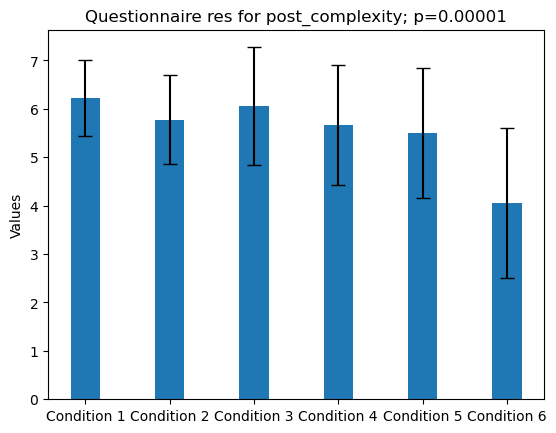

[[6, 6, 7, 5, 6, 6, 6, 6, 6, 7, 6, 7, 7, 6, 5, 5, 5, 6], [6, 5, 7, 5, 6, 6, 7, 7, 1, 5, 5, 5, 5, 7, 6, 6, 6, 5], [6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 4, 4, 7], [4, 7, 2, 6, 5, 5, 1, 6, 5, 3, 6, 5, 6, 6, 5, 5, 4, 5], [7, 5, 6, 6, 5, 5, 7, 4, 7, 4, 6, 3, 6, 6, 5, 4, 7, 5], [3, 5, 6, 6, 4, 4, 2, 6, 2, 2, 3, 6, 7, 4, 4, 4, 4, 6]]
F-statistic: 4.5997087752
p-value: 0.0008027644
✅✅✅✅✅


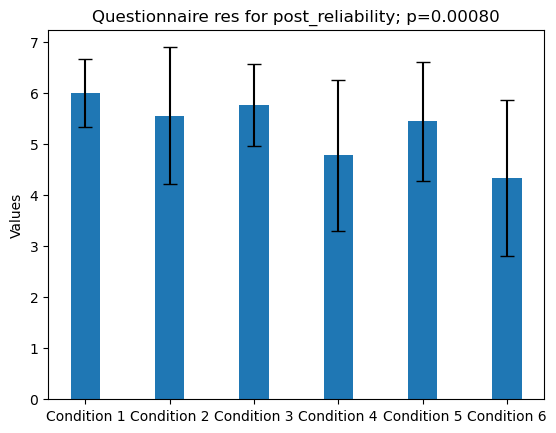

[[6, 6, 5, 6, 6, 5, 6, 6, 7, 5, 7, 6, 6, 5, 5, 4, 4, 6], [6, 6, 6, 5, 7, 5, 6, 5, 2, 6, 4, 5, 5, 6, 6, 6, 6, 6], [6, 6, 6, 4, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 4, 7], [5, 7, 2, 6, 4, 5, 2, 5, 5, 4, 6, 5, 6, 5, 5, 6, 3, 5], [7, 5, 6, 5, 5, 6, 7, 5, 7, 4, 5, 4, 6, 6, 6, 5, 6, 6], [2, 5, 6, 6, 4, 3, 1, 6, 2, 5, 3, 6, 7, 2, 5, 6, 5, 6]]
F-statistic: 3.4471061953
p-value: 0.0064413507
✅✅✅✅✅


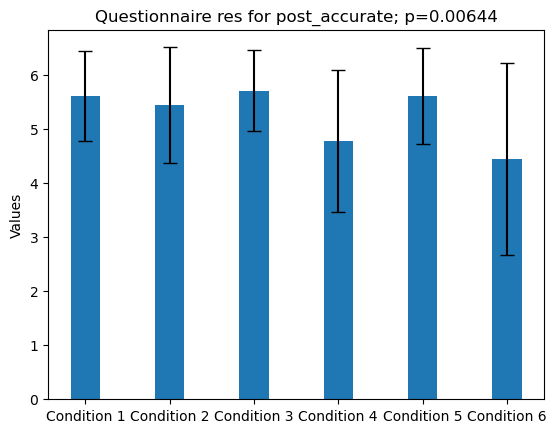

[[6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 5, 4, 4, 6], [6, 4, 6, 6, 7, 3, 7, 4, 3, 6, 5, 5, 4, 7, 4, 6, 7, 5], [6, 6, 3, 3, 6, 6, 5, 4, 5, 6, 5, 5, 2, 5, 4, 1, 6], [4, 7, 3, 6, 1, 5, 2, 6, 4, 2, 7, 4, 4, 6, 1, 6, 2, 5], [7, 5, 6, 5, 3, 5, 5, 5, 7, 4, 5, 2, 7, 6, 7, 4, 5, 7], [3, 4, 5, 6, 4, 3, 1, 5, 2, 2, 4, 7, 6, 2, 4, 3, 5, 6]]
F-statistic: 3.4681048487
p-value: 0.0062010910
✅✅✅✅✅


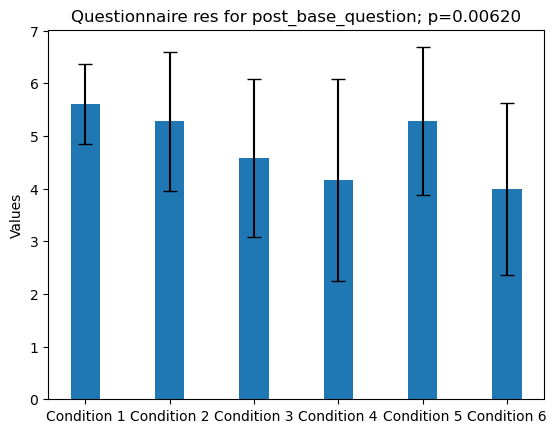

[[4, 4, 5, 5, 6, 5, 5, 6, 6, 5, 7, 7, 7, 5, 5, 4, 3, 5], [6, 4, 6, 5, 7, 6, 6, 7, 2, 4, 4, 4, 4, 7, 6, 6, 6, 4], [6, 4, 5, 4, 6, 4, 7, 5, 6, 2, 3, 6, 6, 5, 5, 2, 7], [4, 7, 2, 6, 1, 1, 2, 6, 5, 3, 6, 5, 4, 4, 1, 6, 1, 5], [6, 6, 5, 6, 4, 1, 7, 3, 7, 4, 5, 5, 6, 6, 7, 6, 6, 5], [5, 4, 6, 7, 2, 1, 1, 3, 1, 2, 3, 7, 4, 1, 5, 4, 4, 7]]
F-statistic: 3.3782653010
p-value: 0.0072960515
✅✅✅✅✅


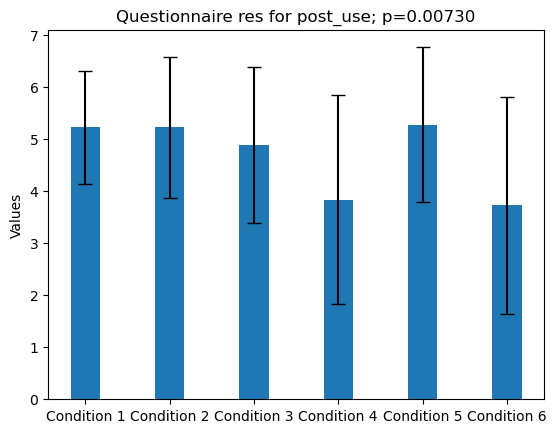

[[5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 5, 6, 5, 5, 6], [6, 5, 6, 5, 6, 6, 7, 6, 2, 3, 5, 4, 4, 7, 5, 6, 5, 5], [6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 4, 6, 6, 5, 4, 3, 7], [4, 7, 2, 6, 5, 3, 2, 5, 4, 3, 6, 5, 6, 6, 5, 6, 2, 5], [7, 5, 5, 6, 4, 5, 7, 4, 7, 5, 5, 5, 6, 6, 5, 6, 4, 6], [4, 5, 6, 6, 5, 2, 2, 5, 1, 3, 3, 6, 7, 3, 5, 5, 4, 7]]
F-statistic: 3.3677636108
p-value: 0.0074360243
✅✅✅✅✅


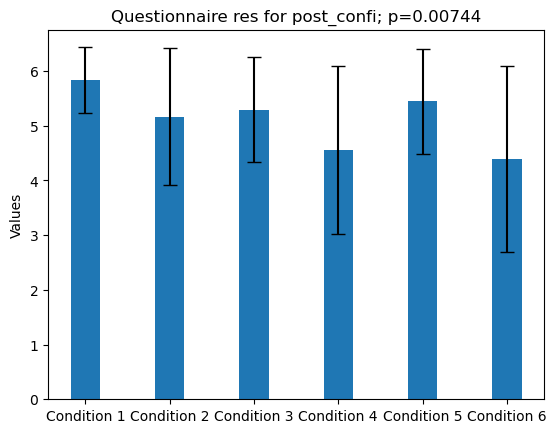

[[5, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6, 7, 7, 7, 6, 6, 5, 7], [6, 6, 6, 5, 7, 5, 7, 7, 4, 7, 4, 5, 5, 7, 6, 5, 6, 5], [6, 7, 6, 6, 7, 6, 3, 6, 6, 6, 4, 5, 6, 6, 6, 4, 7], [6, 7, 5, 6, 4, 7, 2, 7, 6, 6, 5, 5, 6, 2, 7, 5, 4, 5], [4, 4, 7, 5, 4, 5, 7, 4, 2, 5, 4, 7, 7, 7, 5, 3, 7, 4], [5, 5, 7, 6, 3, 3, 6, 7, 3, 4, 3, 7, 1, 2, 5, 6, 6, 7]]
F-statistic: 2.4454597064
p-value: 0.0389733039
✅✅✅✅✅


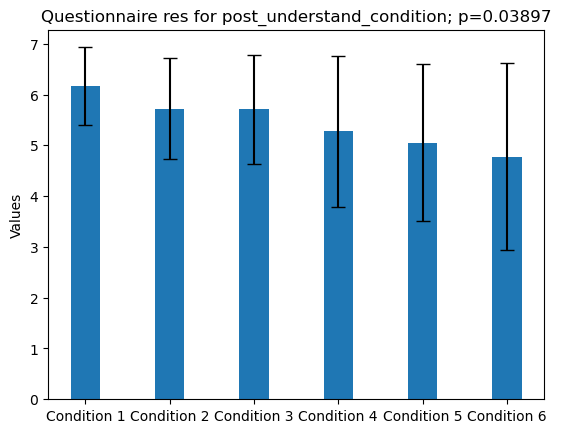

[[6, 6, 4, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 5, 6], [6, 5, 6, 5, 7, 6, 7, 6, 4, 6, 3, 4, 4, 7, 4, 6, 6, 6], [6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6], [5, 7, 5, 6, 6, 5, 2, 6, 6, 4, 6, 5, 6, 5, 5, 5, 2, 5], [7, 5, 5, 6, 4, 5, 7, 5, 7, 5, 4, 4, 6, 7, 6, 4, 5, 5], [2, 5, 6, 6, 6, 3, 2, 6, 2, 5, 4, 7, 6, 4, 5, 5, 5, 6]]
F-statistic: 2.9542319029
p-value: 0.0156906712
✅✅✅✅✅


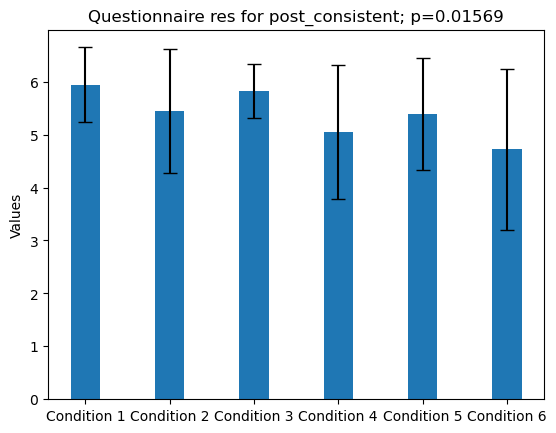

[[3, 3, 1, 4, 5, 5, 2, 7, 2, 5, 2, 2, 4, 1, 4, 4, 3, 4], [5, 3, 2, 5, 5, 6, 2, 4, 5, 5, 5, 3, 4, 1, 4, 2, 5, 3], [4, 2, 1, 1, 3, 6, 1, 2, 2, 3, 7, 4, 7, 2, 6, 4, 3], [3, 6, 3, 6, 1, 5, 2, 1, 3, 1, 3, 5, 2, 5, 1, 4, 1, 5], [6, 5, 1, 1, 6, 5, 1, 2, 3, 1, 4, 5, 3, 1, 2, 1, 5, 6], [3, 3, 2, 4, 4, 6, 1, 1, 5, 3, 1, 1, 1, 1, 2, 6, 7, 6]]
F-statistic: 0.3403023137
p-value: 0.8873566510


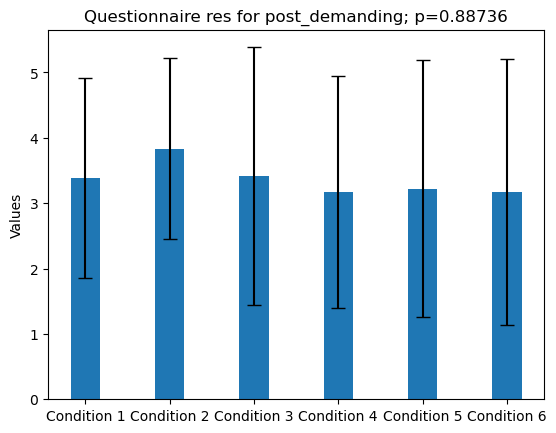

[[5, 4, 6, 6, 7, 6, 6, 7, 7, 6, 6, 7, 6, 7, 3, 5, 4, 6], [5, 5, 6, 5, 6, 7, 7, 6, 1, 5, 3, 4, 4, 7, 6, 6, 7, 5], [6, 5, 4, 4, 6, 5, 6, 2, 5, 6, 1, 6, 6, 5, 5, 2, 6], [5, 7, 3, 6, 1, 4, 2, 4, 5, 2, 7, 5, 5, 6, 5, 5, 1, 6], [7, 5, 5, 6, 4, 5, 6, 5, 6, 4, 4, 6, 7, 6, 5, 4, 6, 5], [4, 4, 7, 6, 4, 3, 2, 6, 2, 2, 4, 7, 6, 1, 5, 3, 5, 6]]
F-statistic: 2.6673585511
p-value: 0.0262546385
✅✅✅✅✅


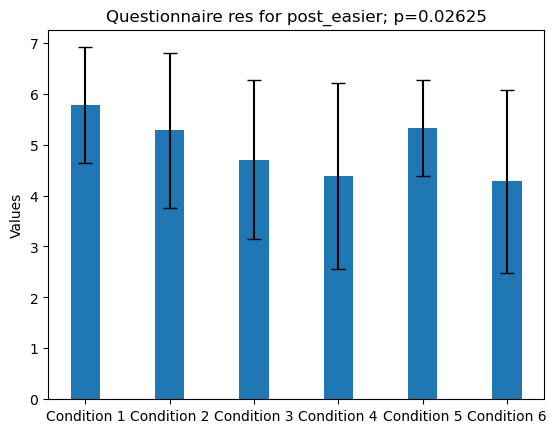

[[3, 2, 1, 2, 2, 4, 1, 6, 2, 5, 1, 1, 3, 1, 4, 3, 5, 2], [3, 3, 2, 5, 2, 6, 1, 4, 2, 2, 5, 5, 4, 1, 3, 2, 4, 3], [3, 1, 1, 1, 3, 4, 1, 1, 2, 3, 7, 2, 2, 1, 3, 2, 1], [3, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 5, 2, 2, 1, 5, 1, 5], [1, 5, 1, 1, 5, 6, 3, 1, 1, 3, 3, 3, 1, 1, 1, 5, 6, 6], [3, 5, 1, 2, 5, 6, 1, 1, 6, 5, 4, 1, 3, 1, 2, 6, 3, 6]]
F-statistic: 1.5068557209
p-value: 0.1943341200


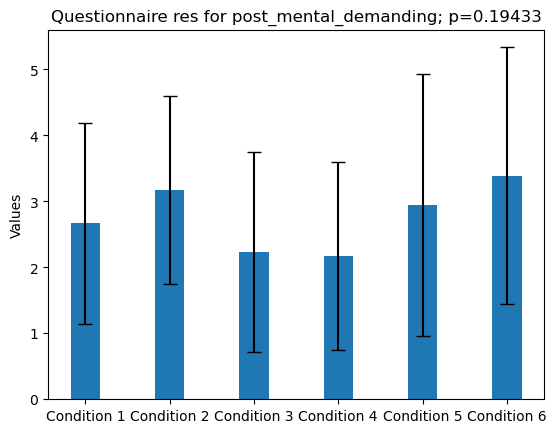

[[6, 6, 7, 6, 6, 4, 7, 6, 7, 5, 7, 4, 7, 7, 5, 6, 5, 6], [6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 3, 4, 5, 7, 6, 4, 4, 6], [4, 6, 6, 6, 6, 5, 4, 7, 6, 7, 2, 4, 6, 6, 6, 6, 5], [6, 7, 5, 7, 7, 7, 2, 7, 5, 5, 7, 5, 6, 6, 7, 6, 6, 5], [6, 5, 7, 6, 5, 5, 4, 7, 6, 1, 6, 6, 7, 7, 7, 7, 6, 6], [4, 6, 4, 5, 7, 7, 7, 7, 4, 5, 7, 7, 7, 5, 7, 6, 6, 6]]
F-statistic: 1.1342978153
p-value: 0.3472032457


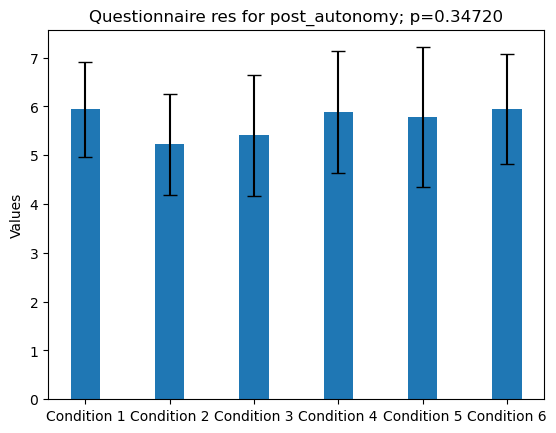

[[6, 4, 3, 5, 6, 5, 4, 5, 6, 5, 6, 6, 6, 5, 5, 4, 4, 6], [4, 5, 4, 5, 6, 6, 7, 5, 2, 4, 3, 4, 4, 6, 6, 6, 6, 5], [6, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 6, 6, 5, 5, 5, 6], [4, 7, 2, 4, 6, 5, 2, 5, 4, 2, 7, 5, 6, 4, 3, 5, 2, 4], [6, 5, 5, 6, 4, 5, 7, 5, 7, 3, 5, 5, 6, 6, 5, 5, 5, 5], [5, 5, 6, 6, 4, 4, 1, 6, 2, 3, 3, 6, 5, 2, 5, 3, 4, 7]]
F-statistic: 2.0617977904
p-value: 0.0763790755


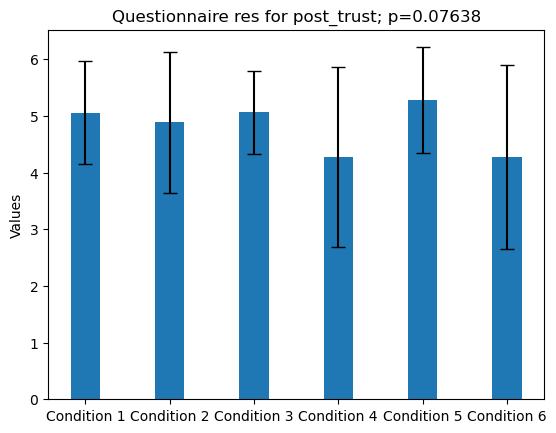

[[6, 6, 6, 5, 6, 5, 6, 3, 6, 7, 7, 5, 5, 4, 6, 5, 5, 6], [6, 5, 7, 5, 5, 6, 5, 7, 6, 3, 2, 3, 5, 7, 4, 6, 6, 6], [6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7], [6, 5, 6, 4, 4, 3, 2, 7, 6, 5, 5, 5, 6, 3, 7, 6, 7, 4], [5, 5, 6, 7, 5, 6, 7, 3, 6, 5, 5, 6, 5, 6, 4, 4, 6, 6], [5, 6, 5, 6, 5, 3, 7, 6, 2, 3, 6, 7, 6, 6, 6, 5, 3, 6]]
F-statistic: 0.5869453621
p-value: 0.7099269677


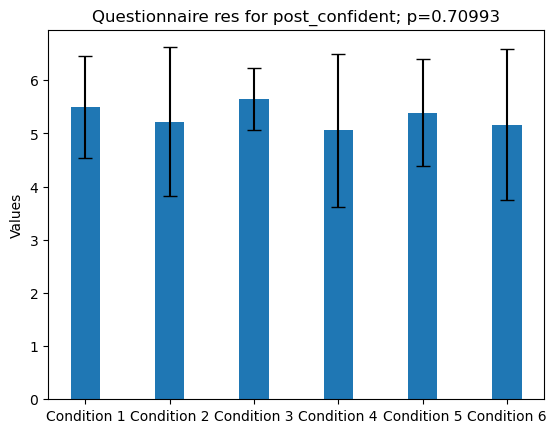

[[5, 4, 6, 6, 7, 7, 5, 7, 7, 5, 6, 7, 7, 5, 5, 5, 5, 6], [5, 6, 7, 5, 6, 7, 7, 4, 4, 6, 5, 5, 6, 4, 5, 6, 6, 6], [6, 3, 4, 2, 4, 5, 5, 6, 5, 7, 1, 4, 2, 5, 6, 2, 3], [6, 7, 2, 6, 1, 2, 2, 6, 4, 2, 6, 5, 2, 4, 1, 4, 3, 5], [4, 5, 2, 6, 3, 5, 3, 1, 6, 3, 4, 2, 1, 5, 5, 2, 6, 6], [5, 4, 5, 6, 5, 2, 1, 6, 4, 3, 5, 7, 1, 2, 3, 5, 6, 7]]
F-statistic: 5.6180871947
p-value: 0.0001307406
✅✅✅✅✅


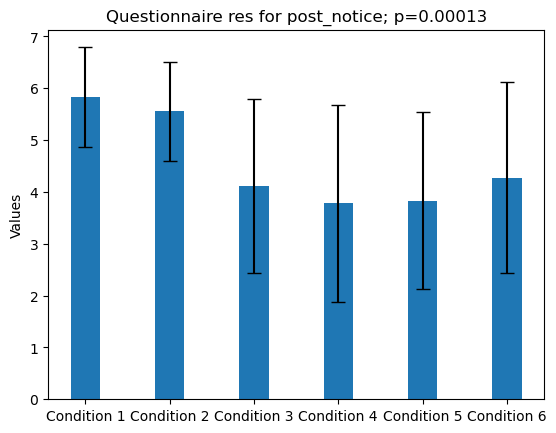

[[5, 4, 5, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 5, 4, 7], [5, 4, 6, 5, 7, 5, 7, 6, 3, 5, 4, 5, 5, 7, 5, 6, 6, 6], [6, 3, 4, 4, 7, 6, 2, 5, 5, 5, 1, 6, 4, 5, 5, 5, 7], [6, 3, 4, 1, 1, 1, 2, 7, 4, 2, 1, 5, 4, 2, 1, 5, 1, 4], [6, 5, 6, 6, 3, 5, 4, 5, 1, 5, 2, 5, 6, 6, 4, 3, 5, 6], [3, 4, 4, 7, 4, 3, 1, 5, 2, 2, 4, 7, 6, 2, 5, 4, 6, 7]]
F-statistic: 8.8069772297
p-value: 0.0000005797
✅✅✅✅✅


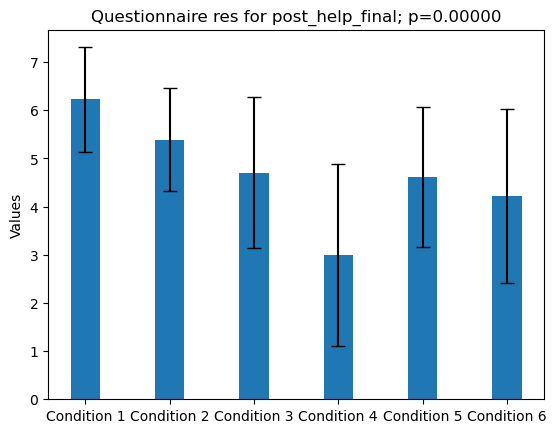

[[6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 5, 6, 4, 4, 7], [5, 5, 6, 5, 6, 6, 7, 6, 2, 5, 4, 4, 4, 7, 4, 7, 7, 6], [6, 7, 4, 4, 6, 5, 5, 6, 5, 5, 1, 7, 6, 6, 5, 5, 7], [4, 7, 4, 7, 1, 3, 2, 5, 5, 2, 6, 5, 5, 5, 7, 6, 1, 5], [6, 5, 6, 6, 3, 6, 7, 4, 7, 5, 4, 5, 7, 7, 5, 3, 3, 6], [4, 5, 6, 6, 3, 4, 1, 6, 1, 4, 3, 7, 4, 1, 4, 3, 4, 6]]
F-statistic: 3.5234410998
p-value: 0.0056099385
✅✅✅✅✅


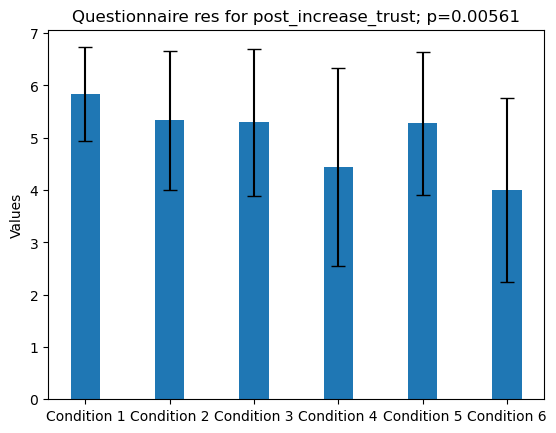

[[5, 6, 4, 7, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 3, 4, 6], [6, 5, 6, 5, 6, 6, 7, 6, 2, 6, 3, 3, 4, 7, 3, 6, 6, 5], [6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 4, 7, 6, 5, 4, 6, 7], [4, 7, 2, 6, 4, 3, 2, 5, 4, 2, 5, 5, 4, 5, 1, 5, 1, 4], [6, 5, 5, 6, 3, 5, 7, 4, 7, 2, 4, 5, 6, 7, 5, 5, 6, 5], [3, 3, 6, 6, 2, 1, 1, 6, 1, 5, 3, 7, 6, 1, 4, 3, 5, 6]]
F-statistic: 4.7502108279
p-value: 0.0006126987
✅✅✅✅✅


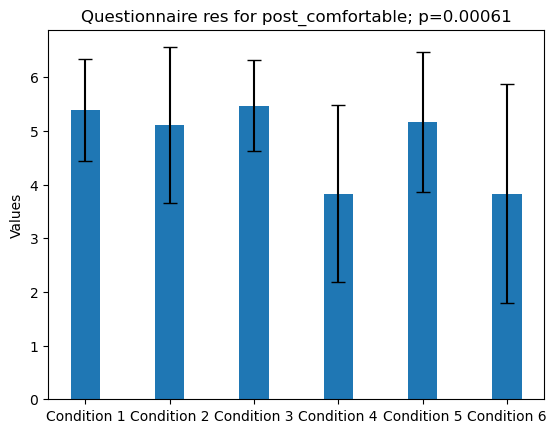

[[5, 4, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 4, 4, 6], [6, 3, 6, 5, 7, 7, 7, 5, 1, 4, 4, 3, 4, 7, 5, 6, 6, 6], [6, 4, 4, 5, 6, 6, 7, 6, 6, 3, 1, 6, 6, 6, 4, 5, 7], [5, 7, 2, 6, 1, 1, 2, 6, 5, 2, 6, 5, 4, 4, 7, 6, 1, 4], [6, 5, 5, 6, 3, 6, 7, 3, 7, 3, 4, 5, 6, 6, 7, 4, 7, 6], [2, 4, 5, 7, 2, 1, 1, 4, 1, 3, 3, 7, 4, 2, 4, 4, 4, 6]]
F-statistic: 3.8424633286
p-value: 0.0031484480
✅✅✅✅✅


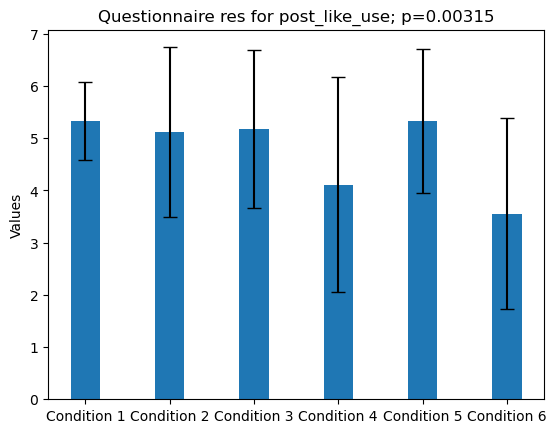

[[3, 1, 5, 4, 2, 6, 5, 6, 6, 4, 6, 2, 6, 4, 4, 2, 4, 5], [5, 5, 5, 5, 5, 6, 7, 6, 2, 3, 3, 4, 1, 7, 2, 4, 2, 3], [6, 7, 3, 2, 5, 5, 4, 4, 5, 3, 1, 5, 7, 5, 4, 4, 4], [4, 2, 2, 7, 2, 1, 2, 6, 5, 3, 2, 5, 4, 4, 3, 5, 1, 4], [4, 5, 4, 1, 3, 5, 7, 1, 5, 5, 3, 4, 6, 2, 1, 5, 6, 4], [1, 4, 1, 6, 3, 2, 4, 5, 4, 3, 4, 5, 7, 5, 4, 4, 5, 6]]
F-statistic: 0.6109212102
p-value: 0.6917142245


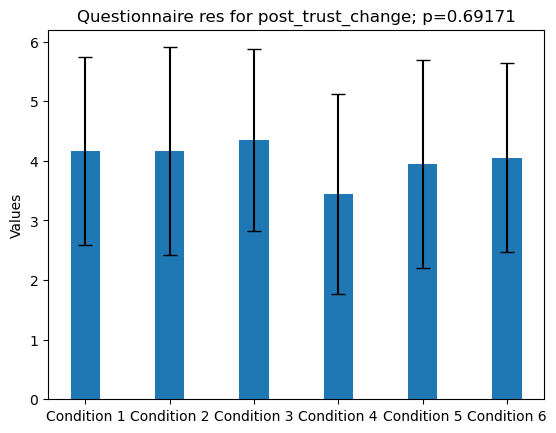

In [7]:
questions = [
    "post_condition_satisfaction",
    "post_satisfaction",
    "post_complexity",
    "post_reliability",
    "post_accurate",
    "post_base_question",
    "post_use",
    "post_confi",
    "post_understand_condition",
    "post_consistent",
    "post_demanding",
    "post_easier",
    "post_mental_demanding",
    "post_autonomy",
    "post_trust",
    "post_confident",
    "post_notice",
    "post_help_final",
    "post_increase_trust",
    "post_comfortable",
    "post_like_use",
    "post_trust_change"
]

for survey_q in questions:
    scores = []
    for condition in range(1, 7):
        data = load_condition_json(condition=condition)
        question_score = []
        for i in data.keys():
            question_score.append(data[i][survey_q])
        
        scores.append(question_score)
    print(scores)

    f, p = anova(scores)
    x_labels = [f"Condition {i}" for i in range(1, 7)]
    plot_bar_chart(scores, x_lables=x_labels, title=f"Questionnaire res for {survey_q}; p={p:.5f}")